In [58]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
#fonction pour télécharger toutes les images d'un dossier et les mettre dans une liste
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
            images.append(img)
    return images

images_bolts = load_images_from_folder("/content/drive/MyDrive/ME datasets/Mechanical parts image recognition/images of mechanical parts/bolt")
images_pin = load_images_from_folder("/content/drive/MyDrive/ME datasets/Mechanical parts image recognition/images of mechanical parts/locatingpin")
images_nut = load_images_from_folder("/content/drive/MyDrive/ME datasets/Mechanical parts image recognition/images of mechanical parts/nut")
images_washer = load_images_from_folder("/content/drive/MyDrive/ME datasets/Mechanical parts image recognition/images of mechanical parts/washer")

In [7]:
#Appliquer un filtre aux images
for (i,j,k,l) in zip(range(len(images_bolts)),range(len(images_pin)),range(len(images_nut)),range(len(images_washer))) :
    images_bolts[i] = cv.medianBlur(images_bolts[i],3)
    images_pin[j] = cv.medianBlur(images_pin[j],3)
    images_nut[k] = cv.medianBlur(images_nut[k],3)
    images_washer[l] = cv.medianBlur(images_washer[l],3)

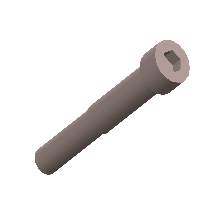

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow( images_bolts[21])

In [9]:
#Redimensionnement des images
def image_resizer (listimage) :
    dim = (112, 112)
    for i in range(len(listimage)) :
        listimage[i] = cv.resize(listimage[i],dim)
image_resizer(images_bolts)
image_resizer(images_pin)
image_resizer(images_nut)
image_resizer(images_washer)

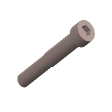

In [10]:
images_bolts[21].shape
cv2_imshow( images_bolts[21])

In [11]:
a=images_bolts[21]
a.shape

(112, 112, 3)

In [12]:
def etiquetage (listimage, etiquette) :
    etiq = []
    for i in range(len(listimage)) :
        etiq.append(etiquette)
    return etiq
etiq_bolts = etiquetage(images_bolts,0)
etiq_pin = etiquetage(images_pin,1)
etiq_nut = etiquetage(images_nut,2)
etiq_washer = etiquetage(images_washer,3)


etiq = etiq_bolts + etiq_pin + etiq_nut + etiq_washer


In [14]:
# Fonction permettant le calcul du HOG pour une liste d'image
def hog_list (listimage) :
    features = []
    hog_image = []
    for i in range(len(listimage)) :
        a, b = hog(listimage[i], orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
        features.append(a)
        hog_image.append(b)
    return features,hog_image


features_bolts,hog_image_bolts = hog_list(images_bolts)
features_pin,hog_image_pin = hog_list(images_pin)
features_nut,hog_image_nut = hog_list(images_nut)
features_washer,hog_image_washer = hog_list(images_washer)

<ipython-input-14-03078607e4f8>:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  a, b = hog(listimage[i], orientations=9, pixels_per_cell=(8, 8),


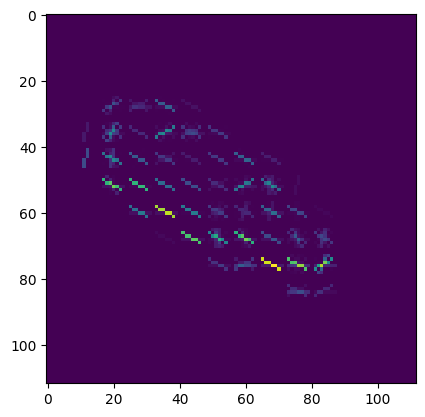

In [17]:
plt.imshow(hog_image_pin[76])

In [15]:
features = features_bolts + features_pin + features_nut + features_washer

In [16]:
features = pd.DataFrame(features)
etiq = np.array(etiq)

In [49]:
model = tf.keras.Sequential(
    [
        Dense(6, activation='relu'),
        Dense(8, activation='relu'),
        Dense(4, activation='softmax')
    ]
)

In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [52]:
x_train, x_test, y_train, y_test = train_test_split(features, etiq, test_size=0.3,random_state=40)

In [53]:
x_train.shape

(5280, 6084)

In [54]:
model.fit(x_train, y_train, batch_size=50, epochs=10)

Epoch 1/10
106/106 [==============================] - 1s 6ms/step - loss: 0.6733 - accuracy: 0.7568
Epoch 2/10
106/106 [==============================] - 1s 5ms/step - loss: 0.2551 - accuracy: 0.9205
Epoch 3/10
106/106 [==============================] - 0s 4ms/step - loss: 0.1723 - accuracy: 0.9523
Epoch 4/10
106/106 [==============================] - 1s 6ms/step - loss: 0.1276 - accuracy: 0.9659
Epoch 5/10
106/106 [==============================] - 1s 6ms/step - loss: 0.0952 - accuracy: 0.9744
Epoch 6/10
106/106 [==============================] - 0s 5ms/step - loss: 0.0710 - accuracy: 0.9841
Epoch 7/10
106/106 [==============================] - 1s 5ms/step - loss: 0.0517 - accuracy: 0.9886
Epoch 8/10
106/106 [==============================] - 1s 6ms/step - loss: 0.0394 - accuracy: 0.9934
Epoch 9/10
106/106 [==============================] - 1s 6ms/step - loss: 0.0294 - accuracy: 0.9953
Epoch 10/10
106/106 [==============================] - 1s 6ms/step - loss: 0.0221 - accuracy: 0.9979

In [55]:
model.evaluate(x_test,y_test, batch_size=20)

114/114 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9695


[0.08317600935697556, 0.9695229530334473]